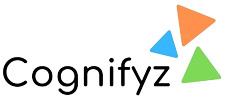

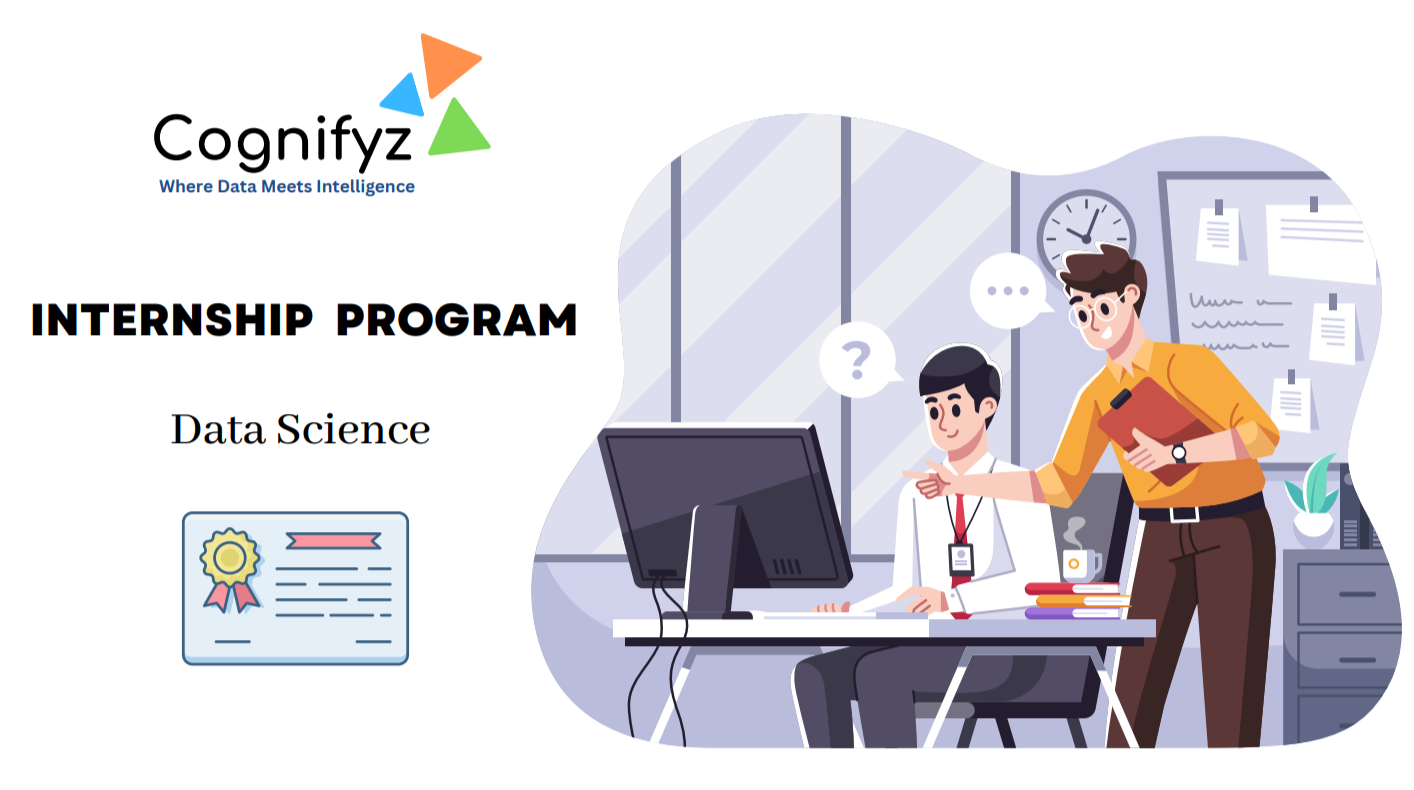

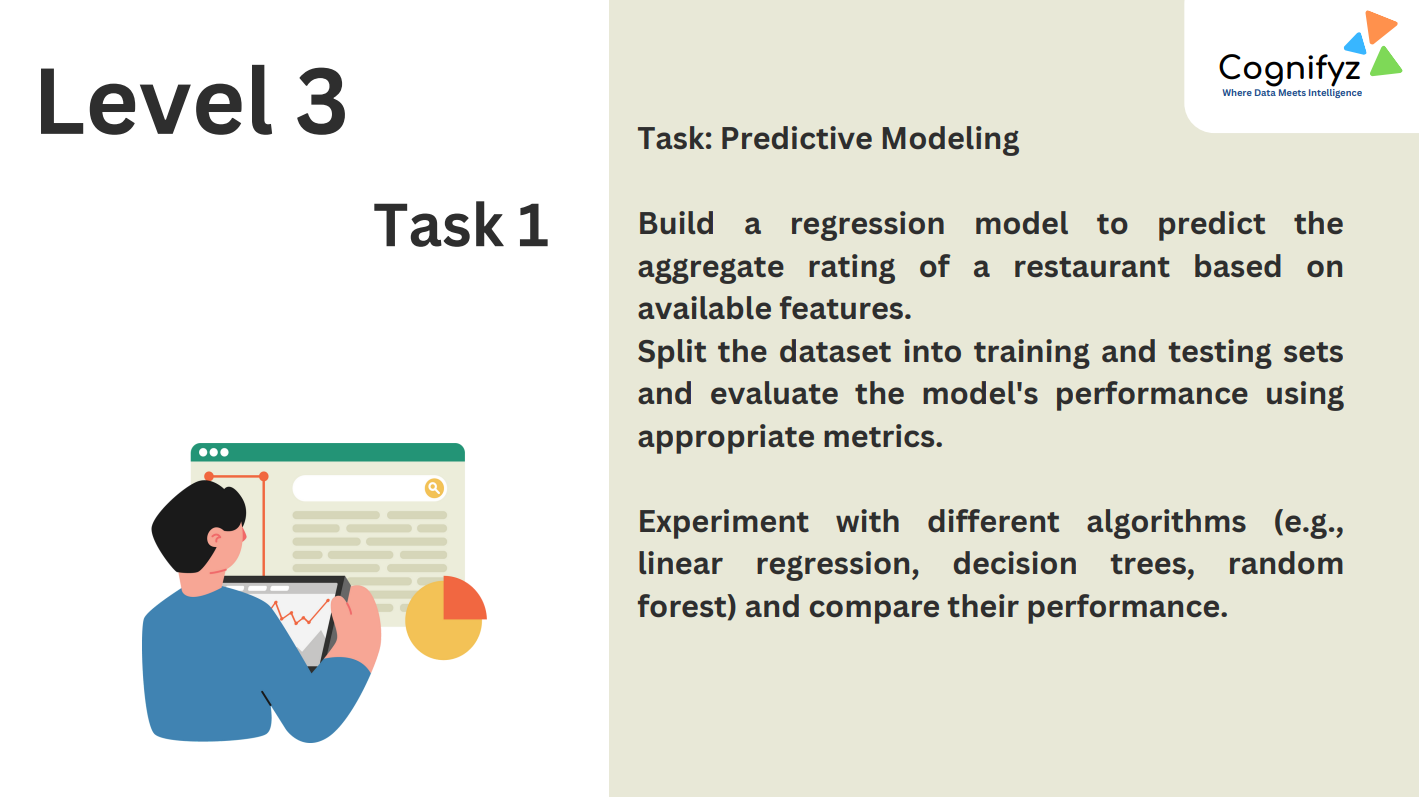

# Task 1 : Predictive Modeling

1. Build a regression model to predict the aggregate rating of a restaurant based on available features.


2. Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.


3. Experiment with different algorithms (e.g.,linear regression, decision trees, random forest) and compare their performance

# Importing Required Libraries

In [16]:
import numpy as np
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [17]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Loading Dataset

In [18]:
df=pd.read_csv('cognifyz Dataset .csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


##### 1. Build a regression model to predict the aggregate rating of a restaurant based on available features.

###### Encoding the categorical columns using Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,3748,162,73,8685,171,172,121.027535,14.565443,920,...,0,1,0,0,0,3,4.8,0,1,314
1,6304287,3172,162,73,6055,593,601,121.014101,14.553708,1111,...,0,1,0,0,0,3,4.5,0,1,591
2,6300002,2896,162,75,4684,308,314,121.056831,14.581404,1671,...,0,1,0,0,0,4,4.4,1,5,270
3,6318506,4707,162,75,8690,862,875,121.056475,14.585318,1126,...,0,0,0,0,0,4,4.9,0,1,365
4,6314302,5523,162,75,8689,862,875,121.057508,14.584450,1122,...,0,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443,208,140,5926,517,523,28.977392,41.022793,1813,...,11,0,0,0,0,3,4.1,1,5,788
9547,5908749,1310,208,140,5962,552,558,29.041297,41.009847,1824,...,11,0,0,0,0,3,4.2,1,5,1034
9548,5915807,3068,208,140,5966,554,561,29.034640,41.055817,1110,...,11,0,0,0,0,4,3.7,5,2,661
9549,5916112,512,208,140,5967,554,561,29.036019,41.057979,1657,...,11,0,0,0,0,4,4.0,1,5,901


In [20]:
#dropping columns which are not required in building regression model
df.drop(['Restaurant ID','Restaurant Name','Country Code', 'Address','Locality', 'Locality Verbose', 'Switch to order menu'], inplace= True, axis=1)

In [21]:
df

,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,73,121.027535,14.565443,920,1100,0,1,0,0,3,4.8,0,1,314
1,73,121.014101,14.553708,1111,1200,0,1,0,0,3,4.5,0,1,591
2,75,121.056831,14.581404,1671,4000,0,1,0,0,4,4.4,1,5,270
3,75,121.056475,14.585318,1126,1500,0,0,0,0,4,4.9,0,1,365
4,75,121.057508,14.584450,1122,1500,0,1,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,140,28.977392,41.022793,1813,80,11,0,0,0,3,4.1,1,5,788
9547,140,29.041297,41.009847,1824,105,11,0,0,0,3,4.2,1,5,1034
9548,140,29.034640,41.055817,1110,170,11,0,0,0,4,3.7,5,2,661
9549,140,29.036019,41.057979,1657,120,11,0,0,0,4,4.0,1,5,901


In [22]:
#checking for the correlation 
cor=df.corr()
cor

,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
City,1.000000,0.117391,-0.004301,0.025764,-0.028838,-0.071996,-0.003762,0.012723,-0.014039,-0.105759,-0.132163,0.110887,-0.098985,-0.078406
Longitude,0.117391,1.000000,0.043207,0.122457,0.045891,0.337334,0.100488,0.178757,0.018787,-0.078939,-0.116818,0.059979,-0.181466,-0.085101
Latitude,-0.004301,0.043207,1.000000,0.038646,-0.111088,-0.101864,0.054658,0.118722,0.015001,-0.166688,0.000516,0.042590,-0.129447,-0.022962
Cuisines,0.025764,0.122457,0.038646,1.000000,0.005755,0.066783,0.050232,-0.017180,0.007708,-0.005489,-0.079494,-0.016180,-0.080025,-0.032362
Average Cost for two,-0.028838,0.045891,-0.111088,0.005755,1.000000,0.045615,0.007758,-0.018974,-0.001862,0.075083,0.051792,-0.049970,0.031439,0.067783
Currency,-0.071996,0.337334,-0.101864,0.066783,0.045615,1.000000,0.000640,0.006991,0.001458,0.075179,-0.006939,-0.040430,0.014598,-0.027111
Has Table booking,-0.003762,0.100488,0.054658,0.050232,0.007758,0.000640,1.000000,0.101224,-0.016816,0.501925,0.189998,-0.021365,0.044043,0.169422
Has Online delivery,0.012723,0.178757,0.118722,-0.017180,-0.018974,0.006991,0.101224,1.000000,0.101730,0.077918,0.225699,0.011477,-0.080937,0.074303
Is delivering now,-0.014039,0.018787,0.015001,0.007708,-0.001862,0.001458,-0.016816,0.101730,1.000000,0.010940,0.019180,0.001886,-0.031970,-0.001124
Price range,-0.105759,-0.078939,-0.166688,-0.005489,0.075083,0.075179,0.501925,0.077918,0.010940,1.000000,0.437944,-0.140468,0.164242,0.309444


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'City'),
  Text(0, 1.5, 'Longitude'),
  Text(0, 2.5, 'Latitude'),
  Text(0, 3.5, 'Cuisines'),
  Text(0, 4.5, 'Average Cost for two'),
  Text(0, 5.5, 'Currency'),
  Text(0, 6.5, 'Has Table booking'),
  Text(0, 7.5, 'Has Online delivery'),
  Text(0, 8.5, 'Is delivering now'),
  Text(0, 9.5, 'Price range'),
  Text(0, 10.5, 'Aggregate rating'),
  Text(0, 11.5, 'Rating color'),
  Text(0, 12.5, 'Rating text'),
  Text(0, 13.5, 'Votes')])

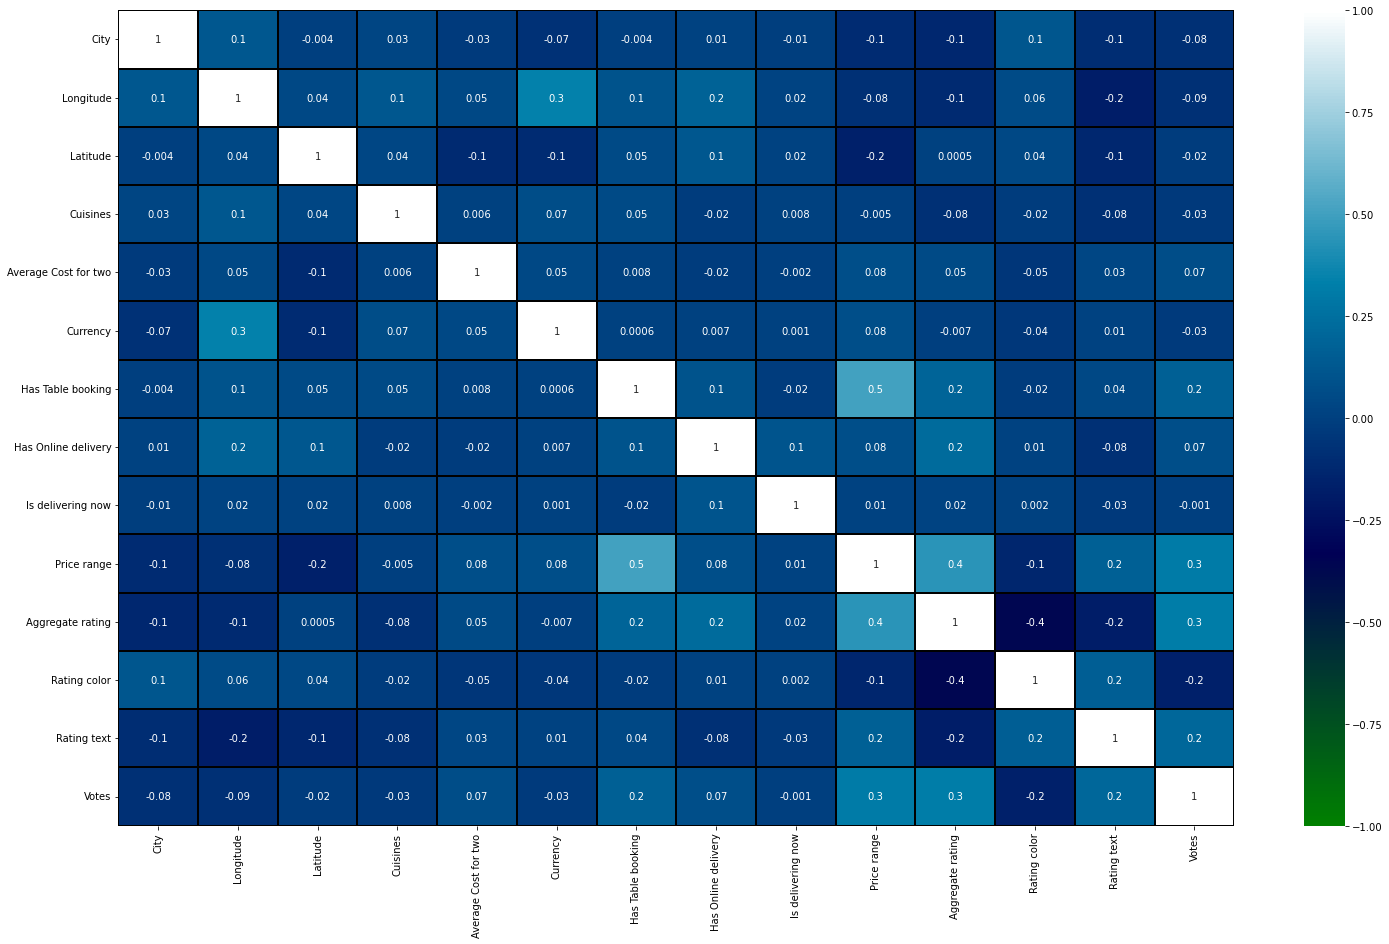

In [23]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="ocean")
plt.yticks(rotation=0)

In [24]:
cor['Aggregate rating'].sort_values(ascending=False)

Aggregate rating        1.000000
Price range             0.437944
Votes                   0.313691
Has Online delivery     0.225699
Has Table booking       0.189998
Average Cost for two    0.051792
Is delivering now       0.019180
Latitude                0.000516
Currency               -0.006939
Cuisines               -0.079494
Longitude              -0.116818
City                   -0.132163
Rating text            -0.182662
Rating color           -0.367054
Name: Aggregate rating, dtype: float64

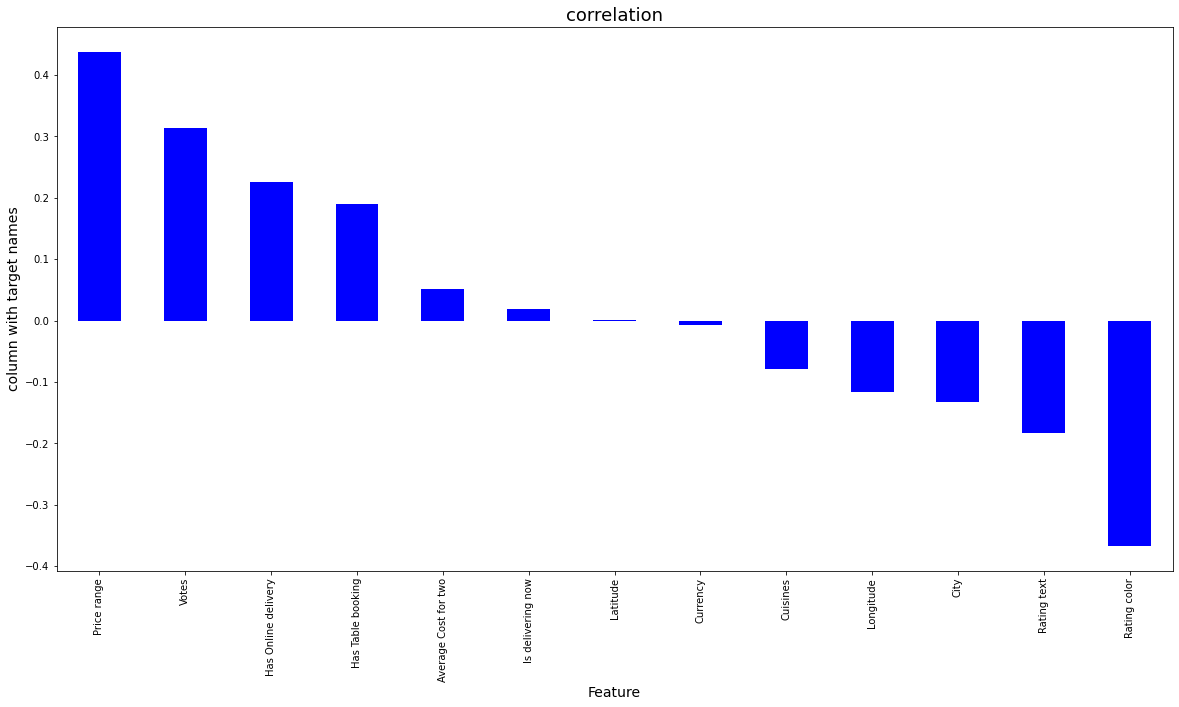

In [65]:
# Visualizing the correlation between label and features
plt.figure(figsize=(20,10))
df.corr()['Aggregate rating'].sort_values(ascending=False).drop(['Aggregate rating']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

The variables "price range" and "votes" exhibit a strong positive correlation with the target variable 'Aggregate rating'. Conversely, the variables "Rating color" and "Rating text" demonstrate a pronounced negative correlation with 'Aggregate rating'. On the other hand, "Latitude" and "currency" display a comparatively weak correlation with the target vari

###### Seprating features and label

In [27]:
x = df.drop("Aggregate rating", axis=1)
y = df["Aggregate rating"]

In [28]:
x.shape

(9551, 13)

In [29]:
y.shape

(9551,)

In [30]:
x

,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Rating color,Rating text,Votes
0,73,121.027535,14.565443,920,1100,0,1,0,0,3,0,1,314
1,73,121.014101,14.553708,1111,1200,0,1,0,0,3,0,1,591
2,75,121.056831,14.581404,1671,4000,0,1,0,0,4,1,5,270
3,75,121.056475,14.585318,1126,1500,0,0,0,0,4,0,1,365
4,75,121.057508,14.584450,1122,1500,0,1,0,0,4,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,140,28.977392,41.022793,1813,80,11,0,0,0,3,1,5,788
9547,140,29.041297,41.009847,1824,105,11,0,0,0,3,1,5,1034
9548,140,29.034640,41.055817,1110,170,11,0,0,0,4,5,2,661
9549,140,29.036019,41.057979,1657,120,11,0,0,0,4,1,5,901


In [31]:
y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64

###### Feature Scaling using Standard Scalarization

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Rating color,Rating text,Votes
0,-0.228533,1.372269,-1.025581,-0.135907,-0.006154,-4.351046,2.692181,-0.587547,-0.059771,1.319803,-1.977859,-0.465442,0.365202
1,-0.228533,1.371945,-1.026647,0.235186,0.000049,-4.351046,2.692181,-0.587547,-0.059771,1.319803,-1.977859,-0.465442,1.009168
2,-0.142317,1.372975,-1.024131,1.323205,0.173743,-4.351046,2.692181,-0.587547,-0.059771,2.424090,-1.308053,1.895070,0.262911
3,-0.142317,1.372966,-1.023775,0.264329,0.018659,-4.351046,-0.371446,-0.587547,-0.059771,2.424090,-1.977859,-0.465442,0.483766
4,-0.142317,1.372991,-1.023854,0.256557,0.018659,-4.351046,2.692181,-0.587547,-0.059771,2.424090,-1.977859,-0.465442,0.167595
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,2.659685,-0.847685,1.378025,1.599096,-0.069428,7.681415,-0.371446,-0.587547,-0.059771,1.319803,-1.308053,1.895070,1.467151
9547,2.659685,-0.846144,1.376849,1.620468,-0.067878,7.681415,-0.371446,-0.587547,-0.059771,1.319803,-1.308053,1.895070,2.039049
9548,2.659685,-0.846305,1.381025,0.233243,-0.063845,7.681415,-0.371446,-0.587547,-0.059771,2.424090,1.371170,0.124686,1.171903
9549,2.659685,-0.846272,1.381221,1.296005,-0.066947,7.681415,-0.371446,-0.587547,-0.059771,2.424090,-1.308053,1.895070,1.729853


###### Checking for multicolinearity

In [66]:
# Find Varience Inflation Factor (VIF) in each scaled column above.

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd


vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,1.055616,City
1,1.304426,Longitude
2,1.105066,Latitude
3,1.025693,Cuisines
4,1.025452,Average Cost for two
5,1.191759,Currency
6,1.431523,Has Table booking
7,1.085998,Has Online delivery
8,1.012789,Is delivering now
9,1.609192,Price range


Accpetable range for vif value is within 10 if the vif value is greater than 10 then we can say that multicolinearity is present in the dataset, but here vif value is less than 10 so we can say that multicolinearity is not present in the dataset.

##### 2. Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.

In [74]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import cross_val_score

###### finding best random state 

In [68]:
best_random_state = None
best_testing_accuracy = float('-inf')

for i in range(0, 50):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lr.fit(x_train, y_train)
    pred_test = lr.predict(x_test)
    testing_accuracy = r2_score(y_test, pred_test)
    
    print(f"At random state {i}, the testing accuracy is: {testing_accuracy}")

    # Update best random state if current testing accuracy is higher
    if testing_accuracy > best_testing_accuracy:
        best_testing_accuracy = testing_accuracy
        best_random_state = i

print(f"\nBest random state for highest testing accuracy: {best_random_state}")


At random state 0, the testing accuracy is: 0.4329372074652392
At random state 1, the testing accuracy is: 0.40097860947622643
At random state 2, the testing accuracy is: 0.4103533797279708
At random state 3, the testing accuracy is: 0.4074185560527347
At random state 4, the testing accuracy is: 0.4235624893932184
At random state 5, the testing accuracy is: 0.3742659899190969
At random state 6, the testing accuracy is: 0.4273743845360287
At random state 7, the testing accuracy is: 0.439478011347894
At random state 8, the testing accuracy is: 0.42047488628822083
At random state 9, the testing accuracy is: 0.42263342124258907
At random state 10, the testing accuracy is: 0.43377937511817666
At random state 11, the testing accuracy is: 0.41012629765309505
At random state 12, the testing accuracy is: 0.41192485037719884
At random state 13, the testing accuracy is: 0.4237944242342717
At random state 14, the testing accuracy is: 0.41739795911987354
At random state 15, the testing accuracy is:

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=36)

##### 3. Experiment with different algorithms (e.g.,linear regression, decision trees, random forest) and compare their performance

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

##### Linear Regression

R2_Score: 0.4471027536521681
cv :- -3.976758532775025
MAE: 0.9598578097951553
MSE: 1.3033846461423932
RMSE: 1.141658725776838
Difference between accuracy score and cross validation score 4.423861286427193


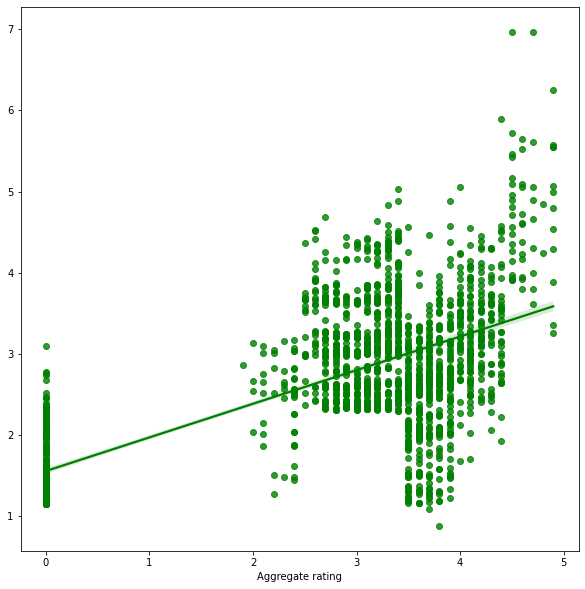

In [100]:
# Checking R2 score for Linear Regression
LR=LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
lr=r2_score(y_test,predLR)
print('R2_Score:',lr)

print('cv :-' ,cross_val_score(LR,x,y,cv=5).mean())
print('MAE:',metrics.mean_absolute_error(y_test, predLR))
print('MSE:',metrics.mean_squared_error(y_test, predLR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))
print("Difference between accuracy score and cross validation score", lr - cross_val_score(LR,x,y,cv=5).mean())

# Visualizing the predicteed values
plt.figure(figsize=(10,10))
sns.regplot(y_test,predLR,color="green")
plt.show()

###### DECISION TREE REGRESSOR

R2_Score: 0.9777577426814963
cv :- 0.9743734515396417
MAE: 0.14526425954997385
MSE: 0.052433281004709564
RMSE: 0.22898314567825634
Difference between accuracy score and cross validation score 0.003367763891887643


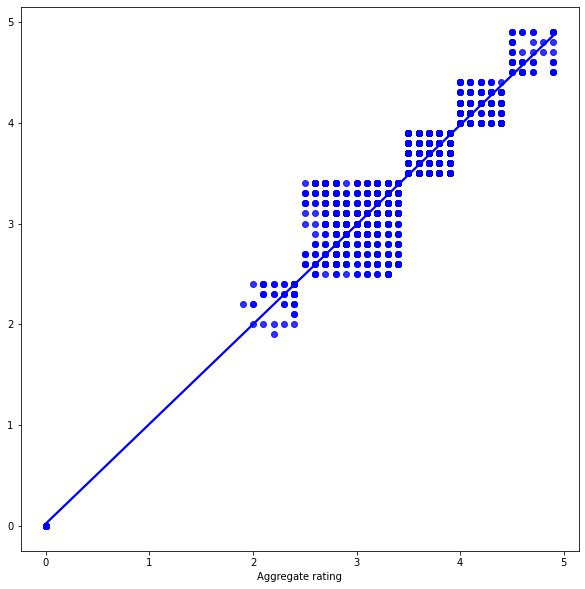

In [101]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
dt=r2_score(y_test,predDTR)
print('R2_Score:',dt)

print('cv :-' ,cross_val_score(DTR,x,y,cv=5).mean())
print('MAE:',metrics.mean_absolute_error(y_test, predDTR))
print('MSE:',metrics.mean_squared_error(y_test, predDTR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))
print("Difference between accuracy score and cross validation score", dt - cross_val_score(DTR,x,y,cv=5).mean())

# Visualizing the predicteed values
plt.figure(figsize=(10,10))
sns.regplot(y_test,predDTR,color="blue")
plt.show()

###### RANDOM FOREST REGRESSOR

R2_Score: 0.9884629997312467
cv :- 0.9860489056382553
MAE: 0.11361695447409734
MSE: 0.027197004709576134
RMSE: 0.16491514396675683
Difference between accuracy score and cross validation score 0.0023688564286677982


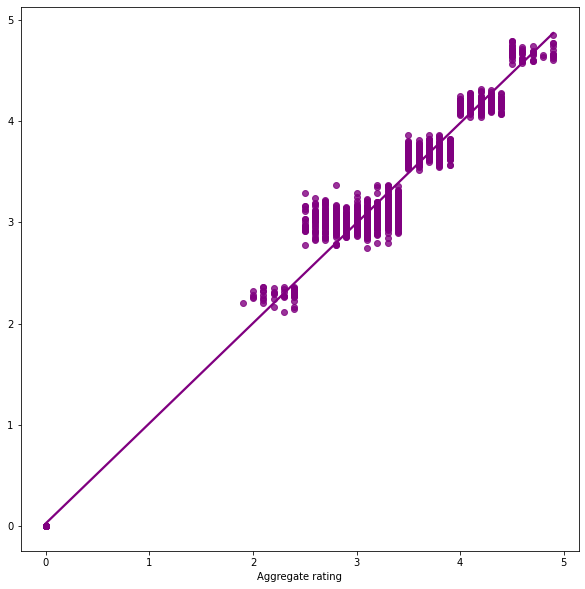

In [99]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
rfr=r2_score(y_test,predRFR)
print('R2_Score:',rfr)

print('cv :-' ,cross_val_score(RFR,x,y,cv=5).mean())
print('MAE:',metrics.mean_absolute_error(y_test, predRFR))
print('MSE:',metrics.mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))
print("Difference between accuracy score and cross validation score", rfr - cross_val_score(RFR,x,y,cv=5).mean())

# Visualizing the predicteed values
plt.figure(figsize=(10,10))
sns.regplot(y_test,predRFR,color="purple")
plt.show()

###### conclusion after comparing all of the regression model

1. Linear Regression: The model has a moderate R2 score, but the cross-validation score is significantly lower, indicating potential overfitting or model instability. The difference between the accuracy score and cross-validation score is high.


2. Decision Tree Regressor: The model performs well with a high R2 score and a close CV score. The difference between accuracy score and cross-validation score is minimal, suggesting good generalization.


3. Random Forest Regressor: This model exhibits excellent performance, with a high R2 score and a close CV score. The difference between accuracy score and cross-validation score is minimal, indicating robustness and generalization.


Overall Recommendation:

1. The Random Forest Regressor seems to be the most suitable model among the three, providing high accuracy, low overfitting, and good generalization.


2. Decision Tree Regressor also performs well and might be a suitable choice depending on specific requirements.


3. Linear Regression may not be the best choice for this dataset due to the significant difference between the accuracy score and cross-validation score. Further investigation or feature engineering may be needed for improvement.